In [1]:
!pip install spacy

In [2]:
!python -m spacy download en_core_web_sm

^C

Aborted.


In [3]:
import json

#Importing the file
file = './dataV1.0.2.json'
with open(file,'r') as file:
    data = json.load(file)

# Extract and store all 'content' fields in a list
content_list = [ [item['content']] for item in data if 'content' in item]

# Print the list
print(content_list[2][0])

Alok Khandai
Operational Analyst (SQL DBA) Engineer - UNISYS

Bengaluru, Karnataka - Email me on Indeed: indeed.com/r/Alok-Khandai/5be849e443b8f467

❖ Having 3.5 Years of IT experience in SQL Database Administration, System Analysis, Design,
Development & Support of MS SQL Servers in Production, Development environments &
Replication and Cluster Server Environments.
❖ Working Experience with relational database such as SQL.
❖ Experience in Installation, Configuration, Maintenance and Administration of SQL Server.
❖ Experience in upgrading SQL Server.
❖ Good experience with implementing DR solution, High Availability of database servers using
Database mirroring and replications and Log Shipping.
❖ Experience in implementing SQL Server security and Object permissions like maintaining
Database authentication modes, creation of users, configuring permissions and assigning roles
to users.
❖ Experience in creating Jobs, Alerts, SQL Mail Agent
❖ Experience in performing integrity checks. Meth

In [8]:
!pip install pdfplumber

In [1]:
import pdfplumber

def pdf_to_text(pdf_path):
    """Extracts text from a PDF file."""
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() + "\n"
    return text.strip()

# Example Usage
pdf_path = "./test/Resume.pdf"  # Replace with your PDF file path
extracted_text = pdf_to_text(pdf_path)

print("PDF text extraction complete! Saved as output.txt")


PDF text extraction complete! Saved as output.txt


In [13]:
!pip install wordcloud

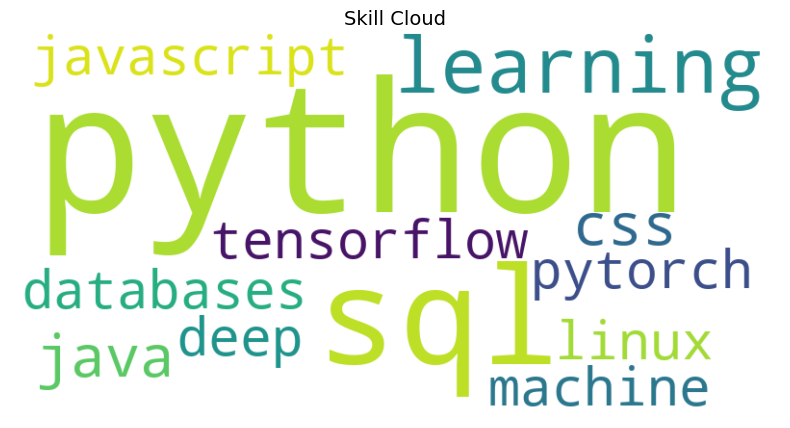

Extracted Name: Deep Patel
Extracted Email: deeppatel2981@gmail.com
Extracted Phone: +1 (215) 688-0287
Extracted Education: ['Pennsylvania State University']
Extracted Skills: ['python', 'java', 'css', 'javascript', 'sql', 'tensorflow', 'pytorch', 'linux', 'sql databases, and the', 'python', 'python', 'deep learning\n', 'machine learning', 'python']


In [23]:
import re
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import csv

# Load pre-trained spaCy model
nlp = spacy.load("en_core_web_sm")
#nlp_skills = spacy.load('TrainedModel/skills')  # Load the trained NER model for skills

# Load skills from Excel sheet
#skills_df = pd.read_excel("./skills_dataset.xlsx")
#skill_keywords = skills_df.iloc[:, 0].dropna().str.lower().tolist()

def load_keywords(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        return set(row[0].strip().lower() for row in reader)

def csv_skills(doc):
    skills_keywords = load_keywords('./newSkills.csv')
    skills = set()
    
    for keyword in skills_keywords:
        if keyword in doc.text.lower():
            skills.add(keyword)
    
    return skills

def extract_skills_from_ner(doc):
    non_skill_labels = {'DATE', 'TIME', 'PERCENT', 'MONEY', 'QUANTITY', 'ORDINAL', 'CARDINAL', 'EMAIL'}
    
    skills = set()
    for ent in nlp_skills(doc.text).ents:
        if ent.label_ == 'SKILL':
            if ent.label_ not in non_skill_labels and not ent.text.isdigit():
                skill_text = ''.join(filter(str.isalpha, ent.text))
                if skill_text:
                    skills.add(skill_text.lower())
    return skills

def is_valid_skill(skill_text):
    return len(skill_text) > 1 and not any(char.isdigit() for char in skill_text)

def extract_skills1(doc):
    skills_csv = csv_skills(doc)
    skills_ner = extract_skills_from_ner(doc)
    
    filtered_skills_csv = {skill for skill in skills_csv if is_valid_skill(skill)}
    filtered_skills_ner = {skill for skill in skills_ner if is_valid_skill(skill)}
    
    combined_skills = filtered_skills_csv.union(filtered_skills_ner)
    
    return list(combined_skills)

def extract_name_hybrid(text):
    name_pattern = r"^([A-Z][a-z]+(?:\s[A-Z][a-z]+)*)"
    match = re.match(name_pattern, text)
    regex_name = match.group().strip() if match else None

    doc = nlp(text)
    ner_name = next((ent.text for ent in doc.ents if ent.label_ == "PERSON"), None)

    return ner_name if ner_name else regex_name

def extract_email_ner(text):
    doc = nlp(text)
    ner_email = next((ent.text for ent in doc.ents if ent.label_ == "EMAIL"), None)
    if ner_email:
        return ner_email
    
    email_pattern = r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}"
    match = re.search(email_pattern, text)
    if match:
        return match.group()
    
    indeed_pattern = r"indeed\.com/r/[\w-]+/\w+"
    indeed_match = re.search(indeed_pattern, text)
    if indeed_match:
        return indeed_match.group()
    
    return None

def extract_phone_ner(text):
    doc = nlp(text)
    ner_phone = next((ent.text for ent in doc.ents if ent.label_ == "PHONE"), None)
    if ner_phone:
        return ner_phone
    
    phone_pattern = r"""
        (?:(?:\+?\d{1,3})?[\s.-]?)?  
        \(?\d{3}\)?[\s.-]?           
        \d{3}[\s.-]?\d{4}            
    """
    match = re.search(phone_pattern, text, re.VERBOSE)
    return match.group().strip() if match else None

def extract_education(doc):
    universities = []
    doc = nlp(doc)
    for entity in doc.ents:
        if entity.label_ == "ORG" and ("university" in entity.text.lower() or "college" in entity.text.lower() or "institute" in entity.text.lower()):
            universities.append(entity.text)
    return universities

def extract_skills(text):
    # """Extracts skills based on keyword matching."""
    # return list(set(skill for skill in skill_keywords if skill in text.lower()))
    # Load the trained model
    nlp_skill = spacy.load("skill_ner_modelV1.2")
    doc = nlp_skill(text)
    # Extract skills
    extracted_skills = [ent.text.lower() for ent in doc.ents if ent.label_ == "SKILL"]
    return extracted_skills

def generate_skill_cloud(skills):
    skills_text = " ".join(skills)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(skills_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Skill Cloud", fontsize=14)
    plt.show()

# Example usage:
resume_text = extracted_text  # Assumed to be defined

doc = nlp(resume_text)
extracted_name = extract_name_hybrid(resume_text)
extracted_email = extract_email_ner(resume_text)
extracted_phone = extract_phone_ner(resume_text)
extracted_education = extract_education(resume_text)
extracted_skills = extract_skills(resume_text)

generate_skill_cloud(extracted_skills)

print("Extracted Name:", extracted_name.strip() if extracted_name else "Not Found")
print("Extracted Email:", extracted_email if extracted_email else "Not Found")
print("Extracted Phone:", extracted_phone if extracted_phone else "Not Found")
print("Extracted Education:", extracted_education if extracted_education else "Not Found")
print("Extracted Skills:", extracted_skills if extracted_skills else "Not Found")
print("="*50)


In [17]:
import csv
import spacy

def load_keywords(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        return set(row[0] for row in reader)

# ----------------------------------Extract Skills--------------------------------
def csv_skills(doc):
    skills_keywords = load_keywords('./newSkills.csv')
    skills = set()

    for keyword in skills_keywords:
        if keyword.lower() in doc.text.lower():
            skills.add(keyword)

    return skills

nlp_skills = spacy.load('TrainedModel/skills')  # Load the trained NER model for skills

def extract_skills_from_ner(doc):
    non_skill_labels = {'DATE', 'TIME', 'PERCENT', 'MONEY', 'QUANTITY', 'ORDINAL', 'CARDINAL', 'EMAIL'}
    
    skills = set()
    for ent in nlp_skills(doc.text).ents:
        if ent.label_ == 'SKILL':
            # Check if the entity text is not in the non-skill labels set
            if ent.label_ not in non_skill_labels and not ent.text.isdigit():
                # Filter out non-alphabetic characters
                skill_text = ''.join(filter(str.isalpha, ent.text))
                if skill_text:
                    skills.add(skill_text)
    return skills

def is_valid_skill(skill_text):
    # Define criteria for valid skills (modify/add criteria as needed)
    return len(skill_text) > 1 and not any(char.isdigit() for char in skill_text)

def extract_skills(doc):
    skills_csv = csv_skills(doc)
    skills_ner = extract_skills_from_ner(doc)
    
    filtered_skills_csv = {skill for skill in skills_csv if is_valid_skill(skill)}
    filtered_skills_ner = {skill for skill in skills_ner if is_valid_skill(skill)}
    
    combined_skills = filtered_skills_csv.union(filtered_skills_ner)  # Combine filtered skills without duplicates
    
    return list(combined_skills)  # Return combined filtered skills as a list

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def compare_with_jd(jd_text, extracted_skills):
    """Compares extracted skills with the job description and returns a similarity score."""
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([jd_text, " ".join(extracted_skills)])
    similarity_score = cosine_similarity(vectors)[0, 1]
    return similarity_score

# jd_text = """
# - Proficiency in Python css linux pytorch java nlp or Go.
# """

jd_text = """
A Data Analyst leverages skills such as C++, Tensorflow, Java, SQL, Python, R, Excel, Tableau, Power BI, data visualization, statistical analysis, data mining, predictive analytics, and machine learning to extract actionable insights and support decision making.
"""

similarity_score = compare_with_jd(jd_text.lower(), extracted_skills)
print("JD Similarity Score:", similarity_score*100)

JD Similarity Score: 23.815828013659168


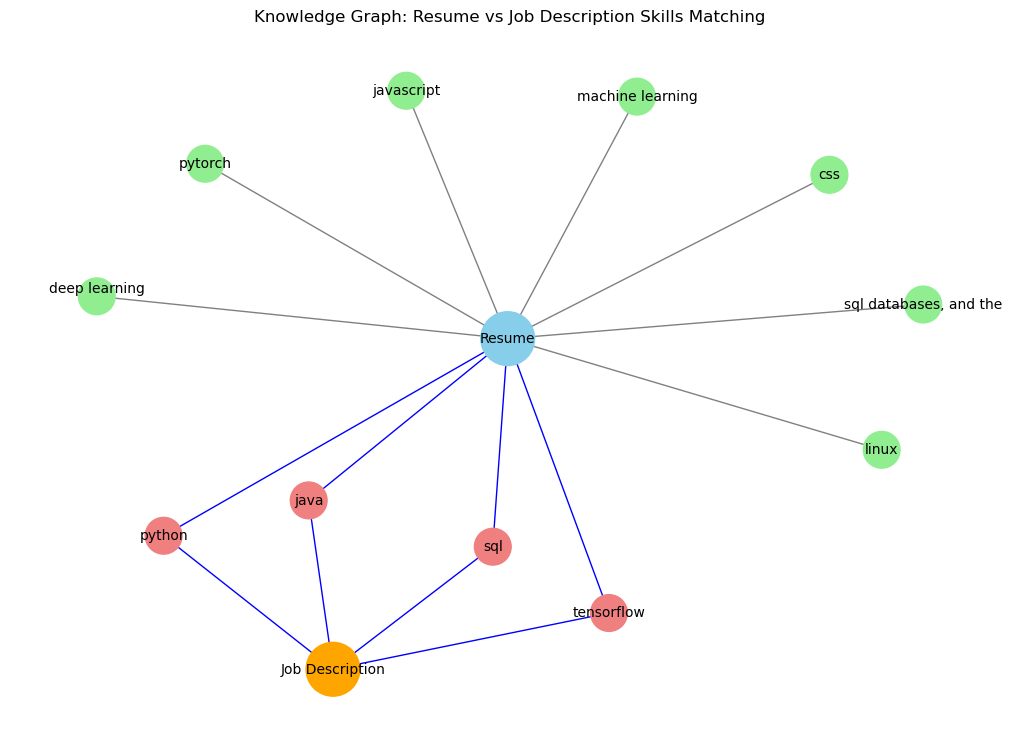

In [33]:
import networkx as nx

def extract_skills(text):
    # """Extracts skills based on keyword matching."""
    # return list(set(skill for skill in skill_keywords if skill in text.lower()))
    # Load the trained model
    nlp_skill = spacy.load("skill_ner_modelV1.0")
    doc = nlp_skill(text)
    # Extract skills
    extracted_skills = [ent.text for ent in doc.ents if ent.label_ == "SKILL"]
    return extracted_skills

def draw_knowledge_graph(jd_text, extracted_skills):
    """Creates a structured knowledge graph with two main nodes: 'Resume' and 'Job Description',
    with surrounding nodes representing skills, and only matched skills linked between them."""
    G = nx.Graph()
    jd_skills = extract_skills(jd_text.lower())  # Simplified JD skill extraction

    G.add_node("Resume", size=1500, color='skyblue')
    G.add_node("Job Description", size=1500, color='orange')

    for skill in extracted_skills:
        G.add_node(skill, size=700, color='lightgreen')
        G.add_edge("Resume", skill, color='gray')  # Link skills to Resume

    for skill in jd_skills:
        G.add_node(skill, size=700, color='lightcoral')
        G.add_edge("Job Description", skill, color='gray')  # Link skills to Job Description

    common_skills = set(extracted_skills).intersection(jd_skills)
    for skill in common_skills:
        G.add_edge("Resume", skill, color='blue')
        G.add_edge("Job Description", skill, color='blue')  # Common skills linked in blue

    pos = nx.spring_layout(G, seed=42)
    edge_colors = [G[u][v]['color'] for u, v in G.edges()]
    node_sizes = [G.nodes[n]['size'] for n in G.nodes()]
    node_colors = [G.nodes[n]['color'] for n in G.nodes()]

    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, edge_color=edge_colors, node_color=node_colors, node_size=node_sizes, font_size=10)
    plt.title("Knowledge Graph: Resume vs Job Description Skills Matching")
    plt.show()

draw_knowledge_graph(jd_text, extracted_skills)
